In [2]:
#!pip install keras

In [2]:
#!pip install tensorflow

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [10]:
df_turbines=pd.read_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/16_Neural Networks/gas_turbines.csv")
df_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [11]:
###Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.
### So we will keep only related columns
df_turbines=df_turbines.iloc[:,[7,0,1,2]]
df_turbines

,TEY,AT,AP,AH
0,114.70,6.8594,1007.9,96.799
1,114.72,6.7850,1008.4,97.118
2,114.71,6.8977,1008.8,95.939
3,114.72,7.0569,1009.2,95.249
4,114.72,7.3978,1009.7,95.150
...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460
15035,111.78,7.8879,1005.9,99.093
15036,110.19,7.2647,1006.3,99.496
15037,110.74,7.0060,1006.8,99.008


In [12]:
df_turbines.shape

(15039, 4)

In [13]:
df_turbines.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [14]:
df_turbines.isnull().sum()

TEY    0
AT     0
AP     0
AH     0
dtype: int64

In [15]:
### Diving target and features
X=df_turbines.iloc[:,1:5]
Y=df_turbines.iloc[:,0]

In [31]:
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [32]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [33]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [37]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

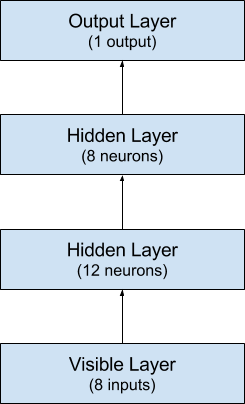

In [38]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 3s 3ms/step - loss: -24682059268096.0000 - accuracy: 0.0000e+00 - val_loss: -24313216368640.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: -25155342434304.0000 - accuracy: 0.0000e+00 - val_loss: -24777884434432.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: -25634640232448.0000 - accuracy: 0.0000e+00 - val_loss: -25248527286272.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: -26119776501760.0000 - accuracy: 0.0000e+00 - val_loss: -25724710813696.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: -26611072106496.0000 - accuracy: 0.0000e+00 - val_loss: -26207292751872.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: -27108623515648.00

In [47]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: -180507543339008.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [48]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

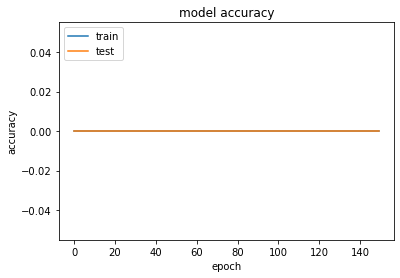

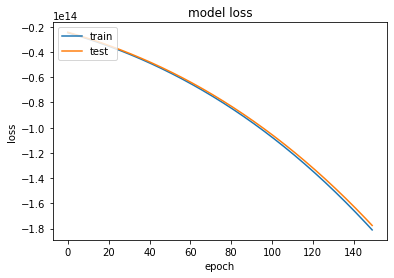

In [50]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### Hypertuning of the model

In [51]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [52]:
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [60]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [61]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\HP\AppData\Local\Temp\ipykernel_12424\120257800.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  18.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  20.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  19.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  19.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  18.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [62]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


In [63]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [64]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\HP\AppData\Local\Temp\ipykernel_12424\384741517.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   5.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   5.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   5.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   5.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   5.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.7s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.6s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.9s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.9s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.9s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.5s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.8s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   6.7s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   5.8s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   6.0s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   6.3s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   5.7s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   6.3s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   6.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   5.7s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   6.6s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   6.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   7.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   6.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   6.2s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   5.9s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   5.9s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   6.9s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   5.8s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   6.9s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   5.8s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   6.1s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   6.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   6.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   6.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   5.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   6.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   6.4s


In [65]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [66]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [67]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


C:\Users\HP\AppData\Local\Temp\ipykernel_12424\2864657069.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   7.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   8.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   8.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   7.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   6.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   6.8s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   6.4s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   8.1s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   6.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   6.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   6.2s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   6.3s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   6.7s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   6.3s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   7.6s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   6.7s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   7.0s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   6.5s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   6.4s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   6.5s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   6.4s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   6.7s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   7.2s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   6.6s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   6.7s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.0s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.6s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   6.4s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   6.8s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   7.0s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   8.1s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   7.0s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   6.8s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   6.6s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   7.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.4s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   6.7s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   6.9s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   6.8s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   6.7s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   6.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   6.6s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   6.8s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   6.4s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   6.6s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   5.9s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   7.0s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   6.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   6.7s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   6.6s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   6.0s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   6.6s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   5.8s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   6.2s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   6.3s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   5.8s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   6.7s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   5.9s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   6.3s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   6.6s


In [68]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'zero'}


### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [69]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [70]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


C:\Users\HP\AppData\Local\Temp\ipykernel_12424\4114978605.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   6.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   6.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   6.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   6.1s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   6.4s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   5.7s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   6.5s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   5.9s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   6.0s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   6.6s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   6.0s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   6.8s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   5.9s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   6.3s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   7.0s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   6.8s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   6.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   5.8s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   5.8s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   6.5s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   5.9s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   6.7s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   6.1s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   5.9s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   6.6s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   5.8s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   6.4s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   6.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   5.8s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   6.8s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   6.2s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   6.4s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   6.2s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   5.9s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   6.4s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   5.8s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   7.2s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   6.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   6.4s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   7.4s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   6.6s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   6.9s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   5.8s


In [71]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


### Training model with optimum values of Hyperparameters

In [72]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [73]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,Y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y.round(),y_predict.round()))

C:\Users\HP\AppData\Local\Temp\ipykernel_12424\792720346.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


470/470 [==============================] - 1s 1ms/step
0.00013298756566261055
